In [1]:
# Load all the modules and auxiliary functions
from aux import *
from architecture import *
from engine import *

[+] Defined all python modules with success
[+] Pytorch device: cuda

 😀 Happy codding! 😀


## Defining a custom trial

In [4]:
trial = optuna.trial.FixedTrial(
    params={
 'NOISE_DIM': 270,
 'BATCH_SIZE':250,

 # Number of layers
 'n_layers_disc': 4,
 'n_layers_gen': 4,

 # Activations
 'activation_disc': 'ReLU',
 'activation_gen': 'ReLU',
 'gen_activation_last': 'PReLU',

 # Disc - Number of neurons / layer // dropout rate
 'disc_n_units_l0': 264,
 'disc_dropout_disc_l0': 0.4,
 'disc_n_units_l1': 128,
 'disc_dropout_disc_l1': 0.4,
 'disc_n_units_l2': 64,
 'disc_dropout_disc_l2': 0.4,
 'disc_n_units_l3': 32,
 'disc_dropout_disc_l3': 0.34,

 # Gen - Number of neurons / layer
 'gen_n_units_l0': 264,
 'gen_n_units_l1': 264,
 'gen_n_units_l2': 128,
 'gen_n_units_l3': 128,

 # Learning Rates
 'lr_disc': 0.00001,
 'lr_gen':  0.00001,
 
 'early_stoping': 400,
 'n_epochs': 1000,
 'optimizer_disc': 'Adam',
 'optimizer_gen': 'Adam'
    }
 )

In [3]:
name = datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
name += "_1000_EPOCHS"
name

'2021_03_16_23_43_09_1000_EPOCHS'

## Training on the custom trial

In [4]:
# Define Engine
Engine = Engine()

# Loading data
Engine._load_data()

[+] Loading train data..
	 - Since training data was selected, only background will be loaded. [HARDCODED]
	 - Compleatly loaded in 7 seconds!
[+] Loading validate data..
	 - Compleatly loaded in 8 seconds!


In [6]:
Engine.train(trial, name=name) 

[+] Inicializing training..

100%|█████████▉| 5582/5603.812 [00:53<00:00, 103.52it/s]
[+] Epoch 0 completed | LossG: 0.0029104722 | LossD: 0.0057060127 | WD: 0.6097031141 | ROC: 0.4345212039 | Best ROC: 0.4345212039 | Best WD: 0.6097031141
100%|█████████▉| 5582/5603.812 [00:55<00:00, 101.23it/s]
[!] Best WD Yet (0.3716821408387), saving...
[+] Epoch 1 completed | LossG: 0.0028183332 | LossD: 0.0055898814 | WD: 0.3716821408 | ROC: 0.4294102021 | Best ROC: 0.4345212039 | Best WD: 0.3716821408
100%|█████████▉| 5582/5603.812 [00:45<00:00, 123.61it/s]
[!] Best WD Yet (0.24877776451089612), saving...
[+] Epoch 2 completed | LossG: 0.0027954855 | LossD: 0.0055848714 | WD: 0.2487777645 | ROC: 0.4325392383 | Best ROC: 0.4345212039 | Best WD: 0.2487777645
100%|█████████▉| 5582/5603.812 [00:46<00:00, 120.79it/s]
[! Best ROC Yet! 0.50652766110111 Saving...
[!] Best WD Yet (0.20596549582008683), saving...
[+] Epoch 3 completed | LossG: 0.0027690895 | LossD: 0.0055427118 | WD: 0.2059654958 | ROC: 0.

KeyboardInterrupt: 

## Testing trained model

In [7]:
device = torch.device('cpu')
torch.set_grad_enabled(False)

FEATURES = 68

# Define Models
disc = define_Discriminator(trial, FEATURES).to(device)

disc.eval()

# Load weights
disc.load_state_dict(torch.load(join(os.getcwd(), "models", f"{name}_disc.plk")))

<All keys matched successfully>

In [8]:
# Load data
data = data_loader(data='test')
_, Features, Label, _, _  = next(create_batch(data, size=data.shape[0], device=device))
del data

[+] Loading test data..
	 - Compleatly loaded in 13 seconds!


In [9]:
# Pass data
predictions = disc(Features).reshape(-1)

In [10]:
confusion_matrix(Label, predictions.round())

array([[      0, 1443294],
       [      0,   66578]])

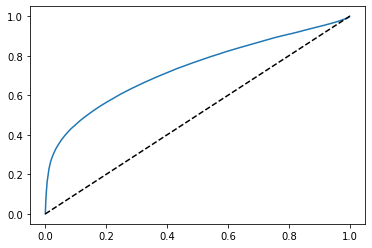

ROC Score: 0.7320969855488617


In [11]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# fpr = False positive rate
# tpr = True positive rate
fpr, tpr, thr = roc_curve(Label , predictions)#, sample_weight=test_data["Weights"])
plt.plot(fpr, tpr, label='ROC')
plt.plot([0,1],[0,1], 'k--')
plt.show()
print("ROC Score:", roc_auc_score(Label, predictions))

In [12]:
del Features, Label, predictions

## Plotting distributions

In [13]:
# Load all the modules and auxiliary functions
from aux import *
from architecture import *
from engine import *

In [14]:
name = "2021_03_15_11_50_51_1000_EPOCHS"

In [15]:
# ['index','Name', 'Weights', 'Label']
columns = ['Jet_Multi', 'Jet1_Mass', 'Jet1_Eta', 'Jet1_Phi', 'Jet1_PT','Jet1_BTag', 'Jet2_Mass', 'Jet2_Eta', 'Jet2_Phi', 'Jet2_PT','Jet2_BTag', 'Jet3_Mass', 'Jet3_Eta', 'Jet3_Phi', 'Jet3_PT','Jet3_BTag', 'Jet4_Mass', 'Jet4_Eta', 'Jet4_Phi', 'Jet4_PT','Jet4_BTag', 'Jet5_Mass', 'Jet5_Eta', 'Jet5_Phi', 'Jet5_PT','Jet5_BTag', 'FatJet1_Tau5', 'FatJet1_Tau4', 'FatJet1_Tau3','FatJet1_Tau2', 'FatJet1_Tau1', 'FatJet1_PT', 'FatJet1_Mass','FatJet1_Eta', 'FatJet1_Phi', 'FatJet2_PT', 'FatJet2_Mass','FatJet2_Eta', 'FatJet2_Phi', 'FatJet3_PT', 'FatJet3_Mass','FatJet3_Eta', 'FatJet3_Phi', 'FatJet4_PT', 'FatJet4_Mass','FatJet4_Eta', 'FatJet4_Phi', 'FatJet5_PT', 'FatJet5_Mass','FatJet5_Eta', 'FatJet5_Phi', 'Electron_Multi', 'Electron1_Eta','Electron1_Phi', 'Electron1_PT', 'Electron2_Eta', 'Electron2_Phi','Electron2_PT', 'Muon_Multi', 'Muon1_Eta', 'Muon1_Phi', 'Muon1_PT','Muon2_Eta', 'Muon2_Phi', 'Muon2_PT', 'MissingET_MET', 'MissingET_Phi','ScalarHT_HT']

In [16]:
## Generating real_data
data = data_loader(data='test')
BATCH_SIZE = int(data.shape[0]/3) # Memory problems....
_, real_data, _, weights, _  = next(create_batch(data, size=BATCH_SIZE, device='cpu'))
del data
# real_data - [BATCH_SIZE, 68]
# label, weights - [BATCH_SIZE]


[+] Loading test data..
	 - Compleatly loaded in 8 seconds!


In [17]:
# Send it to dataframe
real_data = real_data.numpy()
real_data = pd.DataFrame(real_data, columns=columns)#.astype("float")

In [18]:
torch.set_grad_enabled(False)

FEATURES = 68
NOISE_DIM = trial.suggest_int("NOISE_DIM", 100, 300)

# Define Models
gen = define_Generator(trial, NOISE_DIM, FEATURES).to(device)

gen.eval()

# Load weights
gen.load_state_dict(torch.load(join(os.getcwd(), "models", f"{name}_gen.plk")))

<All keys matched successfully>

In [19]:

## Generating fake_data
noise = torch.randn(BATCH_SIZE, NOISE_DIM).to(device) # [BATCH_SIZE, 270]
fake_data = gen(noise) # [BATCH_SIZE, 68]
del noise
# Send it to dataframe
fake_data = fake_data.to('cpu').numpy()
fake_data = pd.DataFrame(fake_data, columns=columns).astype("float")

RuntimeError: CUDA out of memory. Tried to allocate 520.00 MiB (GPU 0; 5.81 GiB total capacity; 781.50 KiB already allocated; 161.25 MiB free; 2.00 MiB reserved in total by PyTorch)

In [10]:
real_data.shape, fake_data.shape

((503290, 68), (503290, 68))

In [11]:
def plot_graphs(real_data, fake_data, bins=50, num_cols=4, weights_real_data = None):
    
    assert (real_data.columns == fake_data.columns).all(), "The data columns aren't the same!"

    # Criar os plots
    num_rows = int(np.ceil((len(list(real_data.columns)) - 1) / num_cols))
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(40, 60))
    i= 0

    for x in tqdm(list(real_data.columns)):
        # Definir a range do histograma
        hist_min = min(real_data[x].min(), fake_data[x].min())
        hist_max = max(real_data[x].max(), fake_data[x].max())
        hist_range = (hist_min, hist_max)

        # Plot
        row, col = int(i/num_cols), i%num_cols
        i +=1

        # print(row, col)
        ax[row, col].set_title(x)
        ax[row, col].set_yscale('log')
        
        # Plot real data
        ax[row, col].hist(real_data[x], bins=bins, alpha=0.5, label='Real Data', weights=(weights_real_data * BATCH_SIZE).numpy(), range=hist_range)
        # Plot fake data
        ax[row, col].hist(fake_data[x], bins=bins, alpha=0.5, label='Fake Data', weights=torch.ones(weights.shape).numpy(), range=hist_range)
        
        ax[row, col].autoscale(enable=True) 
        ax[row, col].legend()



    fig.tight_layout()
    fig.show()

100%|██████████| 68/68 [00:04<00:00, 16.28it/s]
<ipython-input-11-535a736459d8>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


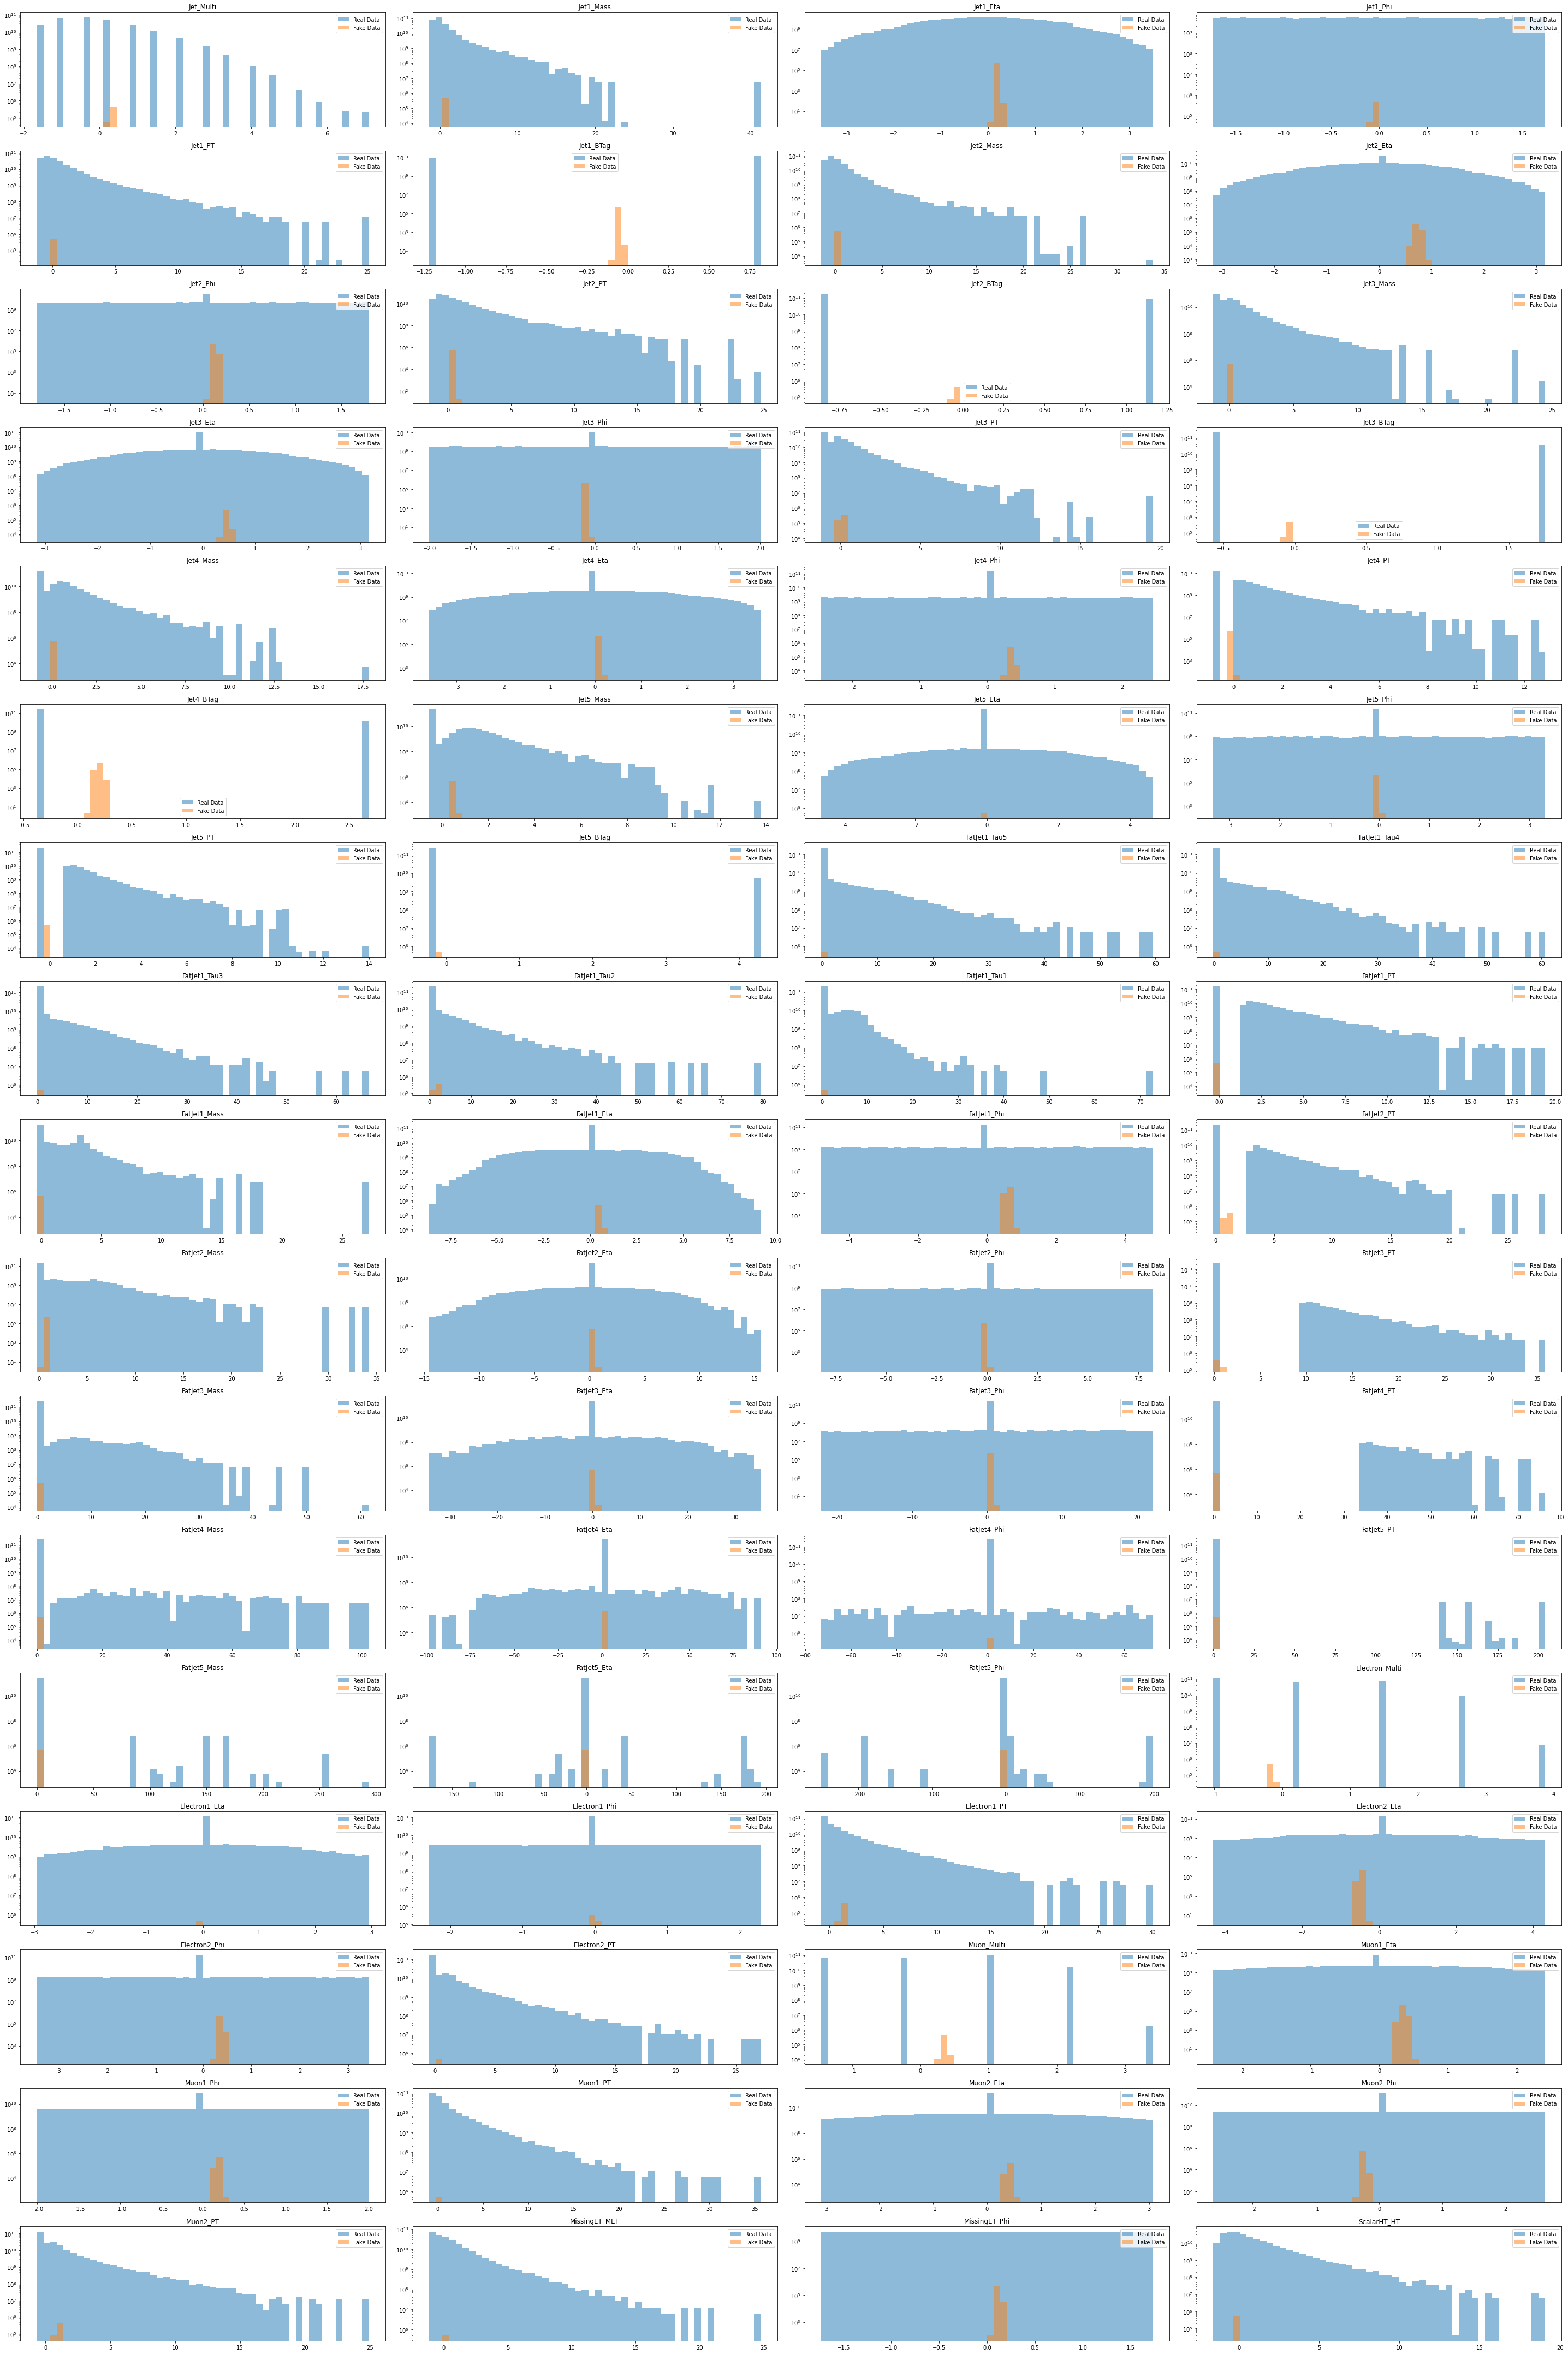

In [12]:
plot_graphs(real_data, fake_data, weights_real_data=weights)